# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

Number of unique job titles: 93
work_year
2020     92302.63
2021     94087.21
2022    133379.51
2023    148954.56
Name: salary_in_usd, dtype: float64


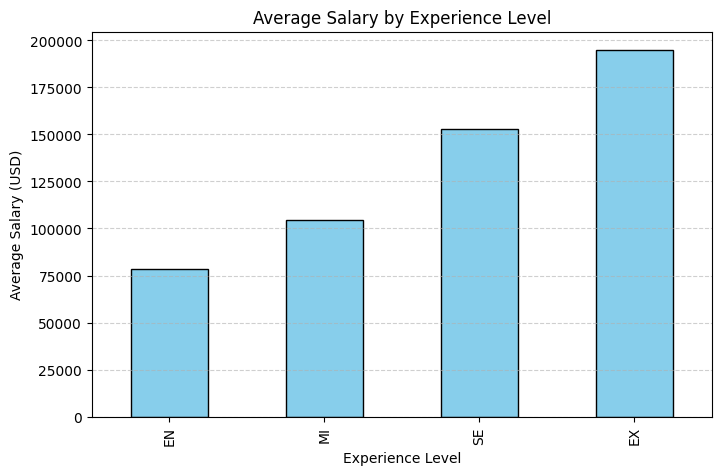

In [4]:
# Check number of unique job titles
unique_jobs = df["job_title"].nunique()
print(f"Number of unique job titles: {unique_jobs}")
df["job_title"].value_counts().head(10)

# Average salary per year
avg_salary_per_year = df.groupby("work_year")["salary_in_usd"].mean().round(2)
print(avg_salary_per_year)

# Average salary per experience level
avg_salary_by_exp = df.groupby("experience_level")["salary_in_usd"].mean().sort_values()

plt.figure(figsize=(8,5))
avg_salary_by_exp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Salary (USD)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()




## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [5]:
# Example: Encode experience_level
le_exp = LabelEncoder()
le_emp = LabelEncoder()
le_job = LabelEncoder()

df['experience_level_encoded'] = le_exp.fit_transform(df['experience_level'])
df['employment_type_encoded'] = le_emp.fit_transform(df['employment_type'])
df['job_title_encoded'] = le_job.fit_transform(df['job_title'])

# Select features and target
features = ['work_year', 
            'experience_level_encoded', 
            'employment_type_encoded', 
            'job_title_encoded']

X = df[features]
y = df['salary_in_usd']

# Display the first few rows
X.head()

,work_year,experience_level_encoded,employment_type_encoded,job_title_encoded
0,2023,0,2,8
1,2023,0,2,8
2,2023,0,2,41
3,2023,0,2,22
4,2023,0,2,8


## 📈 Part 4: Train a Linear Regression Model

In [ ]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [9]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

# Checking how experience levels were encoded
print("Encoding map for experience_level:")
for i, label in enumerate(le_exp.classes_):
    print(f"{label} = {i}")

# DataFrame for 2024 (using experience level encodings)
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3],  
    'employment_type_encoded': [0, 0, 0, 0],   
    'job_title_encoded': [0, 0, 0, 0]         
})

# Making sure columns match the training data
future_data = future_data[X.columns]

# Predict using trained model
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

print("\nPredicted Salaries for 2024:")
print(results)

Encoding map for experience_level:
EN = 0
EX = 1
MI = 2
SE = 3

Predicted Salaries for 2024:
  Experience Level  Predicted 2024 Salary (USD)
0            Entry                116049.864078
1              Mid                135921.916067
2           Senior                155793.968057
3        Executive                175666.020046


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?
   
2. What are the limitations of using only `work_year` and `experience_level`?
   
3. How could you improve this model? (Think: more features, better encoding, etc.)

4. Why is **R² not enough** to trust your predictions?

> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

Answers:

1.The model makes somewhat reasonable predictions since it captures the general trend that salaries increase with experience level and over time. However, the predictions may not be very accurate because the model is too simple and ignores other important factors that influence salary.

2.The main limitation is that these features do not fully represent what determines a person’s salary. Factors such as job title, company location, company size, employment type, and industry can have significant impacts. Without these variables, the model cannot explain much of the salary variation across different roles and regions.

3.The model can be improved by adding more relevant features like job_title, company_location, employment_type, and company_size. Using better encoding methods such as one-hot encoding for categorical variables and applying feature scaling could also enhance accuracy. Collecting more data and using advanced algorithms like Random Forest or Gradient Boosting would further improve performance.

4.R² measures how well the model fits the training data, but it doesn’t show how accurate predictions will be on unseen data. A model can have a high R² yet still produce large errors when predicting new values. That’s why additional metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) are necessary to evaluate true predictive performance.

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀